In [128]:
import os
import pandas as pd
pd.options.display.max_columns = None

# Input paths for the different data sets
refit_input_path = r'C:\Users\nicho\OneDrive - The University of Western Ontario\Ecolux\Databases\REFIT\Regression Training Set'
all_input_paths = [refit_input_path]

output_path = r'C:\Users\nicho\OneDrive - The University of Western Ontario\Ecolux\Databases\Total Regression\allHouses.csv'

# For combining the houses
all_houses = []
house_count = 1

# Getting each dataset
for path in all_input_paths:
    # Number of houses in the dataset
    num_houses = len([name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))])

    # Go through all houses
    for house_id in range(1, num_houses + 1):
        # Read csv and add to houses list
        house_path = path + '\\house' + str(house_id) + '.csv'
        house_df = pd.read_csv(house_path)

        # Putting an arbitrary house number
        house_df.insert(0, 'HouseNum', float(house_count))

        # Add it to the houses list
        all_houses.append(house_df)
        house_count += 1

combined_df = pd.concat(all_houses, ignore_index=True)
combined_df

,HouseNum,TimeSin,TimeCos,DayNumSin,DayNumCos,MonthSin,MonthCos,RealTemp,ApparTemp,Humid,WmoCode,YearBuilt,Type,NumRooms,NumOccupants,Total,AlwaysOn,Intermit,HVAC
0,1.0,-5.000000e-01,-8.660254e-01,0.974928,-0.222521,-0.866025,0.500000,14.0,9.1,59,3,1977,Detached,4,2,868.449,35.781,0.900,831.768
1,1.0,-7.071068e-01,-7.071068e-01,0.974928,-0.222521,-0.866025,0.500000,13.0,8.2,65,3,1977,Detached,4,2,650.936,62.076,1.000,587.860
2,1.0,-8.660254e-01,-5.000000e-01,0.974928,-0.222521,-0.866025,0.500000,11.4,6.6,70,51,1977,Detached,4,2,593.739,90.806,1.000,501.933
3,1.0,-9.659258e-01,-2.588190e-01,0.974928,-0.222521,-0.866025,0.500000,10.5,5.3,66,2,1977,Detached,4,2,292.105,28.412,0.998,262.695
4,1.0,-1.000000e+00,-1.836970e-16,0.974928,-0.222521,-0.866025,0.500000,9.8,4.0,62,1,1977,Detached,4,2,305.909,90.820,30.854,184.235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220464,20.0,8.660254e-01,-5.000000e-01,-0.433884,-0.900969,-0.500000,-0.866025,15.7,14.4,71,0,1985,Detached,3,4,1789.000,139.000,81.000,1569.000
220465,20.0,7.071068e-01,-7.071068e-01,-0.433884,-0.900969,-0.500000,-0.866025,17.3,15.6,65,0,1985,Detached,3,4,1789.000,139.000,81.000,1569.000
220466,20.0,5.000000e-01,-8.660254e-01,-0.433884,-0.900969,-0.500000,-0.866025,18.9,17.2,61,0,1985,Detached,3,4,1789.000,139.000,81.000,1569.000
220467,20.0,2.588190e-01,-9.659258e-01,-0.433884,-0.900969,-0.500000,-0.866025,20.3,19.3,58,2,1985,Detached,3,4,1789.000,139.000,81.000,1569.000


In [129]:
# Encoding the weather code
from sklearn.preprocessing import OneHotEncoder

# Define bins
bins = range(0, 101, 10)  # 0 -> 99

# Labels
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

# Sort the WmoCode
combined_df['binned'] = pd.cut(combined_df['WmoCode'], bins=bins, labels=labels, right=False)

# Encoder stuff
encoder = OneHotEncoder(categories=[labels], handle_unknown='ignore', sparse=False)  # Using sparse=False to get a dense matrix
encoder.fit(combined_df[['binned']])
encoded_wmocode = encoder.transform(combined_df[['binned']])
encoded_df = pd.DataFrame(encoded_wmocode, columns=[f'Wmo_{label}' for label in encoder.categories_[0]])

# Inserting the bins back
wmo_index = combined_df.columns.get_loc('WmoCode')
combined_df.drop(['WmoCode', 'binned'], axis=1, inplace=True)

# Insert the new columns at the position of the original 'WmoCode'
for i, column in enumerate(encoded_df.columns):
    combined_df.insert(wmo_index + i, column, encoded_df[column])

combined_df

,HouseNum,TimeSin,TimeCos,DayNumSin,DayNumCos,MonthSin,MonthCos,RealTemp,ApparTemp,Humid,Wmo_0-9,Wmo_10-19,Wmo_20-29,Wmo_30-39,Wmo_40-49,Wmo_50-59,Wmo_60-69,Wmo_70-79,Wmo_80-89,Wmo_90-99,YearBuilt,Type,NumRooms,NumOccupants,Total,AlwaysOn,Intermit,HVAC
0,1.0,-5.000000e-01,-8.660254e-01,0.974928,-0.222521,-0.866025,0.500000,14.0,9.1,59,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1977,Detached,4,2,868.449,35.781,0.900,831.768
1,1.0,-7.071068e-01,-7.071068e-01,0.974928,-0.222521,-0.866025,0.500000,13.0,8.2,65,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1977,Detached,4,2,650.936,62.076,1.000,587.860
2,1.0,-8.660254e-01,-5.000000e-01,0.974928,-0.222521,-0.866025,0.500000,11.4,6.6,70,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1977,Detached,4,2,593.739,90.806,1.000,501.933
3,1.0,-9.659258e-01,-2.588190e-01,0.974928,-0.222521,-0.866025,0.500000,10.5,5.3,66,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1977,Detached,4,2,292.105,28.412,0.998,262.695
4,1.0,-1.000000e+00,-1.836970e-16,0.974928,-0.222521,-0.866025,0.500000,9.8,4.0,62,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1977,Detached,4,2,305.909,90.820,30.854,184.235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220464,20.0,8.660254e-01,-5.000000e-01,-0.433884,-0.900969,-0.500000,-0.866025,15.7,14.4,71,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1985,Detached,3,4,1789.000,139.000,81.000,1569.000
220465,20.0,7.071068e-01,-7.071068e-01,-0.433884,-0.900969,-0.500000,-0.866025,17.3,15.6,65,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1985,Detached,3,4,1789.000,139.000,81.000,1569.000
220466,20.0,5.000000e-01,-8.660254e-01,-0.433884,-0.900969,-0.500000,-0.866025,18.9,17.2,61,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1985,Detached,3,4,1789.000,139.000,81.000,1569.000
220467,20.0,2.588190e-01,-9.659258e-01,-0.433884,-0.900969,-0.500000,-0.866025,20.3,19.3,58,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1985,Detached,3,4,1789.000,139.000,81.000,1569.000


In [130]:
# This is for the house types
labels = ['bungalow', 'cottage', 'detached', 'end of terrace', 'flat', 'semi-detached', 'mid-terrace', 'student halls', 'factory', 'office', 'university']
labels = [name.upper() for name in labels]

combined_df['Type'] = combined_df['Type'].str.upper()

# Encoder stuff
encoder = OneHotEncoder(categories=[labels], sparse=False)
encoder.fit(combined_df[['Type']])
encoded_type = encoder.transform(combined_df[['Type']])
encoded_df = pd.DataFrame(encoded_type, columns=[f'Type_{label}' for label in encoder.categories_[0]])

# Inserting the bins back
type_index = combined_df.columns.get_loc('Type')
combined_df.drop(['Type'], axis=1, inplace=True)

# Insert the new columns at the position of the original 'Type'
for i, column in enumerate(encoded_df.columns):
    combined_df.insert(type_index + i, column, encoded_df[column])
    
combined_df

,HouseNum,TimeSin,TimeCos,DayNumSin,DayNumCos,MonthSin,MonthCos,RealTemp,ApparTemp,Humid,Wmo_0-9,Wmo_10-19,Wmo_20-29,Wmo_30-39,Wmo_40-49,Wmo_50-59,Wmo_60-69,Wmo_70-79,Wmo_80-89,Wmo_90-99,YearBuilt,Type_BUNGALOW,Type_COTTAGE,Type_DETACHED,Type_END OF TERRACE,Type_FLAT,Type_SEMI-DETACHED,Type_MID-TERRACE,Type_STUDENT HALLS,Type_FACTORY,Type_OFFICE,Type_UNIVERSITY,NumRooms,NumOccupants,Total,AlwaysOn,Intermit,HVAC
0,1.0,-5.000000e-01,-8.660254e-01,0.974928,-0.222521,-0.866025,0.500000,14.0,9.1,59,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1977,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,868.449,35.781,0.900,831.768
1,1.0,-7.071068e-01,-7.071068e-01,0.974928,-0.222521,-0.866025,0.500000,13.0,8.2,65,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1977,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,650.936,62.076,1.000,587.860
2,1.0,-8.660254e-01,-5.000000e-01,0.974928,-0.222521,-0.866025,0.500000,11.4,6.6,70,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1977,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,593.739,90.806,1.000,501.933
3,1.0,-9.659258e-01,-2.588190e-01,0.974928,-0.222521,-0.866025,0.500000,10.5,5.3,66,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1977,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,292.105,28.412,0.998,262.695
4,1.0,-1.000000e+00,-1.836970e-16,0.974928,-0.222521,-0.866025,0.500000,9.8,4.0,62,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1977,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,305.909,90.820,30.854,184.235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220464,20.0,8.660254e-01,-5.000000e-01,-0.433884,-0.900969,-0.500000,-0.866025,15.7,14.4,71,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1985,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4,1789.000,139.000,81.000,1569.000
220465,20.0,7.071068e-01,-7.071068e-01,-0.433884,-0.900969,-0.500000,-0.866025,17.3,15.6,65,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1985,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4,1789.000,139.000,81.000,1569.000
220466,20.0,5.000000e-01,-8.660254e-01,-0.433884,-0.900969,-0.500000,-0.866025,18.9,17.2,61,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1985,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4,1789.000,139.000,81.000,1569.000
220467,20.0,2.588190e-01,-9.659258e-01,-0.433884,-0.900969,-0.500000,-0.866025,20.3,19.3,58,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1985,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4,1789.000,139.000,81.000,1569.000


In [131]:
# Define bins
bins = [0, 1899] + list(range(1900, 2030, 10))

# Labels
labels = ['_under_1899'] + [f'{i}-{i+9}' for i in range(1900, 2030, 10)]

# Sort the year
combined_df['binned'] = pd.cut(combined_df['YearBuilt'], bins=bins, labels=labels, right=False)

# Encoder stuff
encoder = OneHotEncoder(categories=[labels], handle_unknown='ignore', sparse=False)
encoder.fit(combined_df[['binned']])
encoded_yearcode = encoder.transform(combined_df[['binned']])
encoded_df = pd.DataFrame(encoded_yearcode, columns=[f'YearBuilt_{label}' for label in encoder.categories_[0]])

# Inserting the bins back
year_index = combined_df.columns.get_loc('YearBuilt')
combined_df.drop(['YearBuilt', 'binned'], axis=1, inplace=True)

# Insert the new columns at the position of the original 'Year'
for i, column in enumerate(encoded_df.columns):
    combined_df.insert(year_index + i, column, encoded_df[column])

combined_df

,HouseNum,TimeSin,TimeCos,DayNumSin,DayNumCos,MonthSin,MonthCos,RealTemp,ApparTemp,Humid,Wmo_0-9,Wmo_10-19,Wmo_20-29,Wmo_30-39,Wmo_40-49,Wmo_50-59,Wmo_60-69,Wmo_70-79,Wmo_80-89,Wmo_90-99,YearBuilt__under_1899,YearBuilt_1900-1909,YearBuilt_1910-1919,YearBuilt_1920-1929,YearBuilt_1930-1939,YearBuilt_1940-1949,YearBuilt_1950-1959,YearBuilt_1960-1969,YearBuilt_1970-1979,YearBuilt_1980-1989,YearBuilt_1990-1999,YearBuilt_2000-2009,YearBuilt_2010-2019,YearBuilt_2020-2029,Type_BUNGALOW,Type_COTTAGE,Type_DETACHED,Type_END OF TERRACE,Type_FLAT,Type_SEMI-DETACHED,Type_MID-TERRACE,Type_STUDENT HALLS,Type_FACTORY,Type_OFFICE,Type_UNIVERSITY,NumRooms,NumOccupants,Total,AlwaysOn,Intermit,HVAC
0,1.0,-5.000000e-01,-8.660254e-01,0.974928,-0.222521,-0.866025,0.500000,14.0,9.1,59,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,868.449,35.781,0.900,831.768
1,1.0,-7.071068e-01,-7.071068e-01,0.974928,-0.222521,-0.866025,0.500000,13.0,8.2,65,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,650.936,62.076,1.000,587.860
2,1.0,-8.660254e-01,-5.000000e-01,0.974928,-0.222521,-0.866025,0.500000,11.4,6.6,70,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,593.739,90.806,1.000,501.933
3,1.0,-9.659258e-01,-2.588190e-01,0.974928,-0.222521,-0.866025,0.500000,10.5,5.3,66,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,292.105,28.412,0.998,262.695
4,1.0,-1.000000e+00,-1.836970e-16,0.974928,-0.222521,-0.866025,0.500000,9.8,4.0,62,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,305.909,90.820,30.854,184.235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220464,20.0,8.660254e-01,-5.000000e-01,-0.433884,-0.900969,-0.500000,-0.866025,15.7,14.4,71,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4,1789.000,139.000,81.000,1569.000
220465,20.0,7.071068e-01,-7.071068e-01,-0.433884,-0.900969,-0.500000,-0.866025,17.3,15.6,65,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4,1789.000,139.000,81.000,1569.000
220466,20.0,5.000000e-01,-8.660254e-01,-0.433884,-0.900969,-0.500000,-0.866025,18.9,17.2,61,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4,1789.000,139.000,81.000,1569.000
220467,20.0,2.588190e-01,-9.659258e-01,-0.433884,-0.900969,-0.500000,-0.866025,20.3,19.3,58,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4,1789.000,139.000,81.000,1569.000


In [132]:
# Getting the percent humidity
combined_df['Humid'] = combined_df['Humid'] / 100
combined_df

,HouseNum,TimeSin,TimeCos,DayNumSin,DayNumCos,MonthSin,MonthCos,RealTemp,ApparTemp,Humid,Wmo_0-9,Wmo_10-19,Wmo_20-29,Wmo_30-39,Wmo_40-49,Wmo_50-59,Wmo_60-69,Wmo_70-79,Wmo_80-89,Wmo_90-99,YearBuilt__under_1899,YearBuilt_1900-1909,YearBuilt_1910-1919,YearBuilt_1920-1929,YearBuilt_1930-1939,YearBuilt_1940-1949,YearBuilt_1950-1959,YearBuilt_1960-1969,YearBuilt_1970-1979,YearBuilt_1980-1989,YearBuilt_1990-1999,YearBuilt_2000-2009,YearBuilt_2010-2019,YearBuilt_2020-2029,Type_BUNGALOW,Type_COTTAGE,Type_DETACHED,Type_END OF TERRACE,Type_FLAT,Type_SEMI-DETACHED,Type_MID-TERRACE,Type_STUDENT HALLS,Type_FACTORY,Type_OFFICE,Type_UNIVERSITY,NumRooms,NumOccupants,Total,AlwaysOn,Intermit,HVAC
0,1.0,-5.000000e-01,-8.660254e-01,0.974928,-0.222521,-0.866025,0.500000,14.0,9.1,0.59,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,868.449,35.781,0.900,831.768
1,1.0,-7.071068e-01,-7.071068e-01,0.974928,-0.222521,-0.866025,0.500000,13.0,8.2,0.65,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,650.936,62.076,1.000,587.860
2,1.0,-8.660254e-01,-5.000000e-01,0.974928,-0.222521,-0.866025,0.500000,11.4,6.6,0.70,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,593.739,90.806,1.000,501.933
3,1.0,-9.659258e-01,-2.588190e-01,0.974928,-0.222521,-0.866025,0.500000,10.5,5.3,0.66,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,292.105,28.412,0.998,262.695
4,1.0,-1.000000e+00,-1.836970e-16,0.974928,-0.222521,-0.866025,0.500000,9.8,4.0,0.62,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,305.909,90.820,30.854,184.235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220464,20.0,8.660254e-01,-5.000000e-01,-0.433884,-0.900969,-0.500000,-0.866025,15.7,14.4,0.71,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4,1789.000,139.000,81.000,1569.000
220465,20.0,7.071068e-01,-7.071068e-01,-0.433884,-0.900969,-0.500000,-0.866025,17.3,15.6,0.65,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4,1789.000,139.000,81.000,1569.000
220466,20.0,5.000000e-01,-8.660254e-01,-0.433884,-0.900969,-0.500000,-0.866025,18.9,17.2,0.61,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4,1789.000,139.000,81.000,1569.000
220467,20.0,2.588190e-01,-9.659258e-01,-0.433884,-0.900969,-0.500000,-0.866025,20.3,19.3,0.58,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4,1789.000,139.000,81.000,1569.000


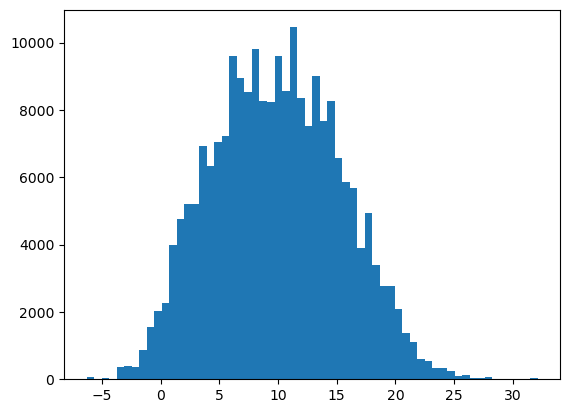

In [133]:
import matplotlib.pyplot as plt

# Plotting the temp variation
plt.figure(1)
plt.hist(combined_df['RealTemp'], bins=60)
plt.show()

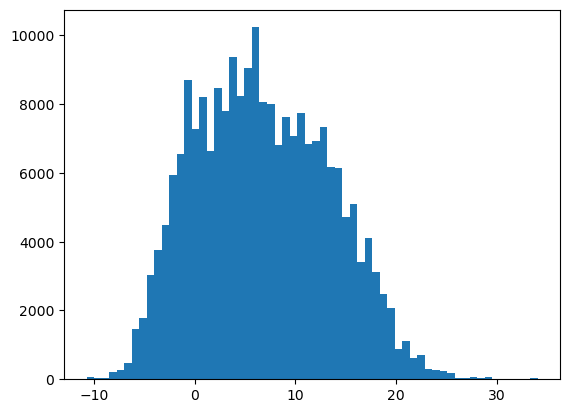

In [134]:
# Plotting the temp variation
plt.figure(2)
plt.hist(combined_df['ApparTemp'], bins=60)
plt.show()

In [136]:
from sklearn.preprocessing import StandardScaler
from joblib import dump

# For the temperature values
temp_scaler = StandardScaler()
combined_df[['RealTemp', 'ApparTemp']] = temp_scaler.fit_transform(combined_df[['RealTemp', 'ApparTemp']])

# Saving the model to make predictions in the future
scaler_path = r'C:\Users\nicho\OneDrive - The University of Western Ontario\Ecolux\Databases\Total Regression\tempNormalization.joblib'
dump(temp_scaler, scaler_path)

combined_df

,HouseNum,TimeSin,TimeCos,DayNumSin,DayNumCos,MonthSin,MonthCos,RealTemp,ApparTemp,Humid,Wmo_0-9,Wmo_10-19,Wmo_20-29,Wmo_30-39,Wmo_40-49,Wmo_50-59,Wmo_60-69,Wmo_70-79,Wmo_80-89,Wmo_90-99,YearBuilt__under_1899,YearBuilt_1900-1909,YearBuilt_1910-1919,YearBuilt_1920-1929,YearBuilt_1930-1939,YearBuilt_1940-1949,YearBuilt_1950-1959,YearBuilt_1960-1969,YearBuilt_1970-1979,YearBuilt_1980-1989,YearBuilt_1990-1999,YearBuilt_2000-2009,YearBuilt_2010-2019,YearBuilt_2020-2029,Type_BUNGALOW,Type_COTTAGE,Type_DETACHED,Type_END OF TERRACE,Type_FLAT,Type_SEMI-DETACHED,Type_MID-TERRACE,Type_STUDENT HALLS,Type_FACTORY,Type_OFFICE,Type_UNIVERSITY,NumRooms,NumOccupants,Total,AlwaysOn,Intermit,HVAC
0,1.0,-5.000000e-01,-8.660254e-01,0.974928,-0.222521,-0.866025,0.500000,0.751993,0.351595,0.59,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,868.449,35.781,0.900,831.768
1,1.0,-7.071068e-01,-7.071068e-01,0.974928,-0.222521,-0.866025,0.500000,0.569056,0.215746,0.65,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,650.936,62.076,1.000,587.860
2,1.0,-8.660254e-01,-5.000000e-01,0.974928,-0.222521,-0.866025,0.500000,0.276357,-0.025763,0.70,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,593.739,90.806,1.000,501.933
3,1.0,-9.659258e-01,-2.588190e-01,0.974928,-0.222521,-0.866025,0.500000,0.111714,-0.221990,0.66,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,292.105,28.412,0.998,262.695
4,1.0,-1.000000e+00,-1.836970e-16,0.974928,-0.222521,-0.866025,0.500000,-0.016342,-0.418217,0.62,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,305.909,90.820,30.854,184.235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220464,20.0,8.660254e-01,-5.000000e-01,-0.433884,-0.900969,-0.500000,-0.866025,1.062986,1.151596,0.71,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4,1789.000,139.000,81.000,1569.000
220465,20.0,7.071068e-01,-7.071068e-01,-0.433884,-0.900969,-0.500000,-0.866025,1.355684,1.332728,0.65,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4,1789.000,139.000,81.000,1569.000
220466,20.0,5.000000e-01,-8.660254e-01,-0.433884,-0.900969,-0.500000,-0.866025,1.648383,1.574238,0.61,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4,1789.000,139.000,81.000,1569.000
220467,20.0,2.588190e-01,-9.659258e-01,-0.433884,-0.900969,-0.500000,-0.866025,1.904495,1.891219,0.58,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4,1789.000,139.000,81.000,1569.000


In [137]:
from sklearn.preprocessing import StandardScaler

# For the temperature values
temp_scaler = StandardScaler()
combined_df[['RealTemp', 'ApparTemp']] = temp_scaler.fit_transform(combined_df[['RealTemp', 'ApparTemp']])

combined_df

,HouseNum,TimeSin,TimeCos,DayNumSin,DayNumCos,MonthSin,MonthCos,RealTemp,ApparTemp,Humid,Wmo_0-9,Wmo_10-19,Wmo_20-29,Wmo_30-39,Wmo_40-49,Wmo_50-59,Wmo_60-69,Wmo_70-79,Wmo_80-89,Wmo_90-99,YearBuilt__under_1899,YearBuilt_1900-1909,YearBuilt_1910-1919,YearBuilt_1920-1929,YearBuilt_1930-1939,YearBuilt_1940-1949,YearBuilt_1950-1959,YearBuilt_1960-1969,YearBuilt_1970-1979,YearBuilt_1980-1989,YearBuilt_1990-1999,YearBuilt_2000-2009,YearBuilt_2010-2019,YearBuilt_2020-2029,Type_BUNGALOW,Type_COTTAGE,Type_DETACHED,Type_END OF TERRACE,Type_FLAT,Type_SEMI-DETACHED,Type_MID-TERRACE,Type_STUDENT HALLS,Type_FACTORY,Type_OFFICE,Type_UNIVERSITY,NumRooms,NumOccupants,Total,AlwaysOn,Intermit,HVAC
0,1.0,-5.000000e-01,-8.660254e-01,0.974928,-0.222521,-0.866025,0.500000,0.751993,0.351595,0.59,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,868.449,35.781,0.900,831.768
1,1.0,-7.071068e-01,-7.071068e-01,0.974928,-0.222521,-0.866025,0.500000,0.569056,0.215746,0.65,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,650.936,62.076,1.000,587.860
2,1.0,-8.660254e-01,-5.000000e-01,0.974928,-0.222521,-0.866025,0.500000,0.276357,-0.025763,0.70,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,593.739,90.806,1.000,501.933
3,1.0,-9.659258e-01,-2.588190e-01,0.974928,-0.222521,-0.866025,0.500000,0.111714,-0.221990,0.66,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,292.105,28.412,0.998,262.695
4,1.0,-1.000000e+00,-1.836970e-16,0.974928,-0.222521,-0.866025,0.500000,-0.016342,-0.418217,0.62,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,305.909,90.820,30.854,184.235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220464,20.0,8.660254e-01,-5.000000e-01,-0.433884,-0.900969,-0.500000,-0.866025,1.062986,1.151596,0.71,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4,1789.000,139.000,81.000,1569.000
220465,20.0,7.071068e-01,-7.071068e-01,-0.433884,-0.900969,-0.500000,-0.866025,1.355684,1.332728,0.65,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4,1789.000,139.000,81.000,1569.000
220466,20.0,5.000000e-01,-8.660254e-01,-0.433884,-0.900969,-0.500000,-0.866025,1.648383,1.574238,0.61,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4,1789.000,139.000,81.000,1569.000
220467,20.0,2.588190e-01,-9.659258e-01,-0.433884,-0.900969,-0.500000,-0.866025,1.904495,1.891219,0.58,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4,1789.000,139.000,81.000,1569.000


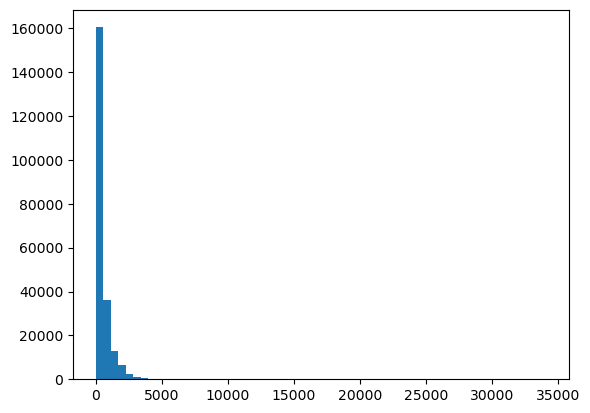

In [138]:
# Plotting the  variation
plt.figure(3)
plt.hist(combined_df['Total'], bins=60)
plt.show()

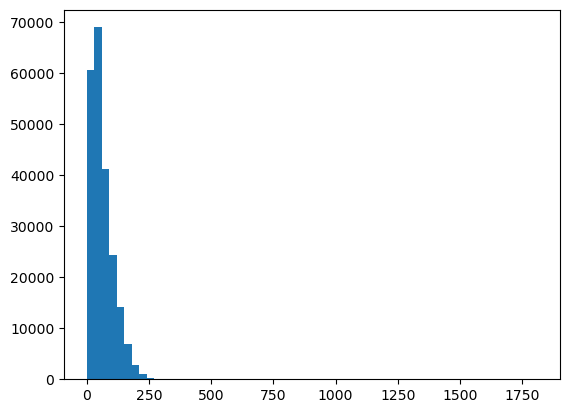

In [139]:
# Plotting the  variation
plt.figure(4)
plt.hist(combined_df['AlwaysOn'], bins=60)
plt.show()

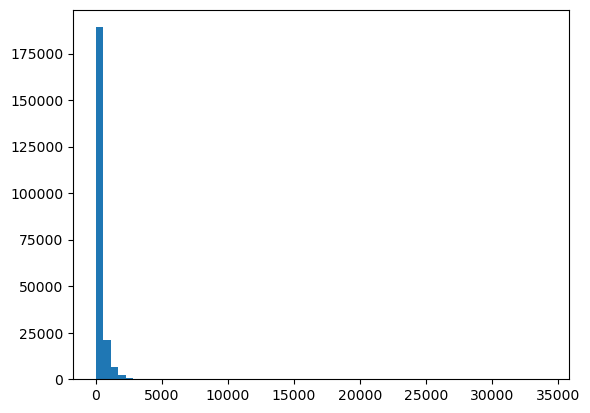

In [140]:
# Plotting the  variation
plt.figure(5)
plt.hist(combined_df['HVAC'], bins=60)
plt.show()

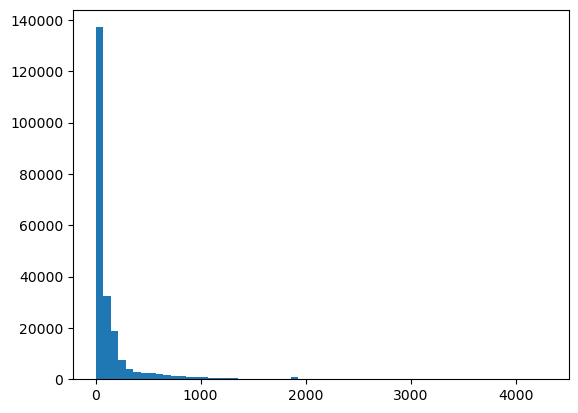

In [141]:
# Plotting the  variation
plt.figure(6)
plt.hist(combined_df['Intermit'], bins=60)
plt.show()

In [142]:
# Perform log scaling, check new distribution
from scipy import stats
import numpy as np

# Log transform for total and HVAC
#combined_df[['Total', 'AlwaysOn', 'Intermit', 'HVAC']] = combined_df[['Total', 'AlwaysOn', 'Intermit', 'HVAC']].apply(lambda x: np.log10(x + 1))

lambda_vals = []

# Applying a box-cox transform
for column in ['Total', 'AlwaysOn', 'Intermit', 'HVAC']:
    # Lambda is for reversing the transform
    combined_df[column], lambda_val = stats.yeojohnson(combined_df[column])
    lambda_vals.append(lambda_val)

print(lambda_vals)

[-0.06419593996677918, 0.39118312109134956, 0.05555067194630658, -0.08553711493808511]


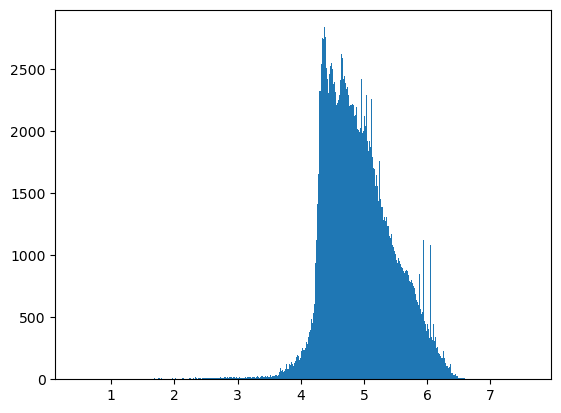

In [143]:
# Plotting the  variation
plt.figure(7)
plt.hist(combined_df['Total'], bins=500)
plt.show()

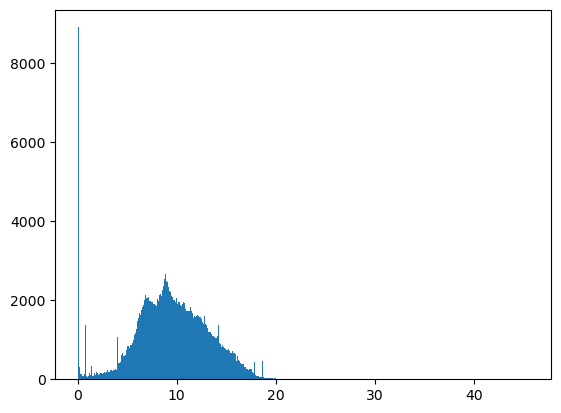

In [144]:
# Plotting the  variation
plt.figure(8)
plt.hist(combined_df['AlwaysOn'], bins=500)
plt.show()

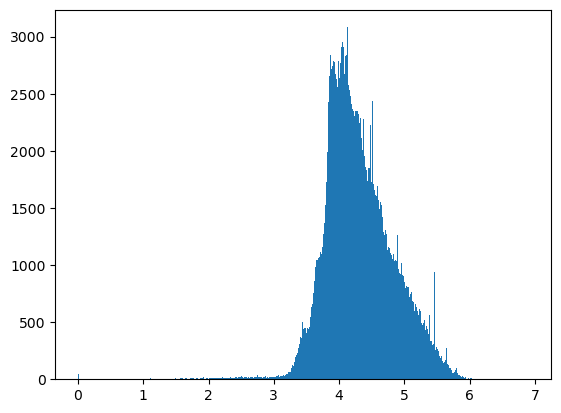

In [145]:
# Plotting the  variation
plt.figure(9)
plt.hist(combined_df['HVAC'], bins=500)
plt.show()

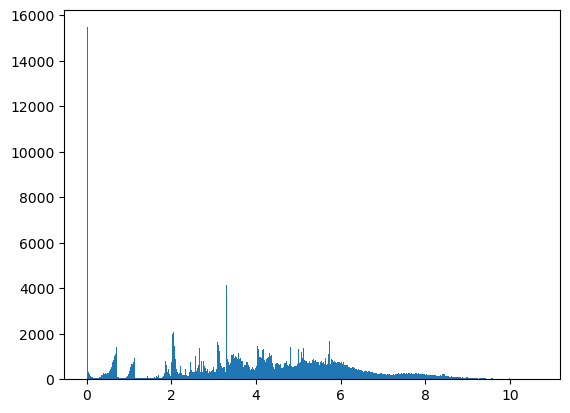

In [146]:
# Plotting the  variation
plt.figure(10)
plt.hist(combined_df['Intermit'], bins=500)
plt.show()

In [148]:
# Dividing occupants and rooms by 10
combined_df['NumRooms'] = combined_df['NumRooms'] / 10
combined_df['NumOccupants'] = combined_df['NumOccupants'] / 10

combined_df

,HouseNum,TimeSin,TimeCos,DayNumSin,DayNumCos,MonthSin,MonthCos,RealTemp,ApparTemp,Humid,Wmo_0-9,Wmo_10-19,Wmo_20-29,Wmo_30-39,Wmo_40-49,Wmo_50-59,Wmo_60-69,Wmo_70-79,Wmo_80-89,Wmo_90-99,YearBuilt__under_1899,YearBuilt_1900-1909,YearBuilt_1910-1919,YearBuilt_1920-1929,YearBuilt_1930-1939,YearBuilt_1940-1949,YearBuilt_1950-1959,YearBuilt_1960-1969,YearBuilt_1970-1979,YearBuilt_1980-1989,YearBuilt_1990-1999,YearBuilt_2000-2009,YearBuilt_2010-2019,YearBuilt_2020-2029,Type_BUNGALOW,Type_COTTAGE,Type_DETACHED,Type_END OF TERRACE,Type_FLAT,Type_SEMI-DETACHED,Type_MID-TERRACE,Type_STUDENT HALLS,Type_FACTORY,Type_OFFICE,Type_UNIVERSITY,NumRooms,NumOccupants,Total,AlwaysOn,Intermit,HVAC
0,1.0,-5.000000e-01,-8.660254e-01,0.974928,-0.222521,-0.866025,0.500000,0.751993,0.351595,0.59,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.2,5.489313,7.916515,0.653434,5.113765
1,1.0,-7.071068e-01,-7.071068e-01,0.974928,-0.222521,-0.866025,0.500000,0.569056,0.215746,0.65,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.2,5.301124,10.376566,0.706665,4.915874
2,1.0,-8.660254e-01,-5.000000e-01,0.974928,-0.222521,-0.866025,0.500000,0.276357,-0.025763,0.70,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.2,5.240370,12.421932,0.706665,4.823848
3,1.0,-9.659258e-01,-2.588190e-01,0.974928,-0.222521,-0.866025,0.500000,0.111714,-0.221990,0.66,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.2,4.759992,7.039468,0.705625,4.433928
4,1.0,-1.000000e+00,-1.836970e-16,0.974928,-0.222521,-0.866025,0.500000,-0.016342,-0.418217,0.62,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.2,4.791903,12.422825,3.816293,4.211360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220464,20.0,8.660254e-01,-5.000000e-01,-0.433884,-0.900969,-0.500000,-0.866025,1.062986,1.151596,0.71,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.4,5.946285,15.110089,4.992937,5.460985
220465,20.0,7.071068e-01,-7.071068e-01,-0.433884,-0.900969,-0.500000,-0.866025,1.355684,1.332728,0.65,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.4,5.946285,15.110089,4.992937,5.460985
220466,20.0,5.000000e-01,-8.660254e-01,-0.433884,-0.900969,-0.500000,-0.866025,1.648383,1.574238,0.61,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.4,5.946285,15.110089,4.992937,5.460985
220467,20.0,2.588190e-01,-9.659258e-01,-0.433884,-0.900969,-0.500000,-0.866025,1.904495,1.891219,0.58,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.4,5.946285,15.110089,4.992937,5.460985


In [149]:
combined_df.to_csv(output_path, index=False)
print('Created merged dataset')

Created merged dataset


# # Check distribution first
# from joblib import dump

# # For the energy usage values
# energy_scaler = StandardScaler()
# combined_df[['Total', 'AlwaysOn', 'Intermit', 'HVAC']] = energy_scaler.fit_transform(combined_df[['Total', 'AlwaysOn', 'Intermit', 'HVAC']])

# # Saving the normalization so I can get the values back
# scaler_path = r'C:\Users\nicho\OneDrive - The University of Western Ontario\Ecolux\Databases\Total Regression\znormalization.jolib'
# dump(energy_scaler, scaler_path)
# combined_df